In [1]:
import os
nthreads = 1
os.environ["OMP_NUM_THREADS"] = str(nthreads)
os.environ["OPENBLAS_NUM_THREADS"] = str(nthreads)
os.environ["MKL_NUM_THREADS"] = str(nthreads)

In [2]:
import matplotlib as mpl
from cmcrameri import cm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import inferagni as ia

/home/harrison/miniforge3/envs/proteus/lib/python3.12/site-packages/astropy/config/paths.py:55: AstropyUserWarning: XDG_CONFIG_HOME is set to '/home/harrison/.var/app/com.visualstudio.code/config', but the default location, /home/harrison/.astropy/config, already exists, and takes precedence. This environment variable will be ignored.
  return set_temp_config._get_dir_path(rootname)


In [3]:
# %config InlineBackend.figure_format = 'retina'

In [4]:
datadir = "../src/inferagni/data/"

gr = ia.grid.Grid(datadir)

Loading data from disk...
    Source: /home/harrison/Projects/InferAGNI/src/inferagni/data
Loading grid of scalar quantities
    Grid size: 264600 points
    Input vars:
      Teff            : range [2500      , 5750      ]
      instellation    : range [1         , 1000      ]
      logZ            : range [-2        , 1         ]
      logCO           : range [-3        , 0         ]
      mass_tot        : range [1         , 10        ]
      frac_core       : range [0.2       , 0.7       ]
      frac_atm        : range [0.001     , 0.25      ]
    Output vars: 
      succ, flux_loss, r_bound, p_surf,
      t_surf, r_surf, μ_surf, g_surf, t_phot,
      r_phot, μ_phot, g_phot, vmr_H2,
      vmr_H2O, vmr_CO2, vmr_CO, vmr_O2,
      vmr_OH, vmr_NH3, vmr_NO2, vmr_N2,
      vmr_SO2, vmr_H2S, vmr_H2SO4, Kzz_max,
      conv_ptop, conv_pbot, H_phot
Loading emission spectra
    done
Loading atmosphere profiles
    done
--------------------------------------------------



In [ ]:
# Observables (already scaled)

# L 98-59 d
# obs = {
#     "_name":        "L 98-59 d",
#     "r_phot":       [1.521, (0.119,0.098)],
#     "mass_tot":     [2.14,  (0.25,0.29)],
#     "μ_phot":       [9.18,  (2.51,2.41)],
#     "instellation": [5.0,    0.5],
#     "Teff":         [3415.0, 60.0]
# }

# obs = ia.planets.get_obs("TOI-270 d")
# obs["μ_phot"] = [5.47, (1.25, 1.14)]
# obs.pop("instellation")
# print(obs)

obs = ia.planets.get_obs("TOI-421 b")
obs["μ_phot"] = [2.66,(3.6,0.3)]
# obs.pop("instellation")
print(obs)

# Others
# obs = ia.planets.get_obs("K2-18 b")
# obs = ia.planets.get_obs("TRAPPIST-1 c")

Found observations for exoplanet 'HD 110113 b'
    r_phot          :       2.05 ± 0.12      
    mass_tot        :       4.55 ± 0.62      
    Teff            :       5732 ± 50        
    instellation    :    757.729 ± 47.2526   
{'_name': 'HD_110113_b', 'r_phot': [2.05, 0.12], 'mass_tot': [4.55, 0.62], 'Teff': [5732.0, 50.0], 'instellation': [757.7290040152609, 47.25261426317522]}


In [6]:
# Do retrieval
keys, samples = ia.retrieve.run(gr, obs,
                                n_walkers=30, n_procs=15, n_steps=1000,
                                extra_keys=["vmr_H2O","vmr_CO","t_surf"])

Prepare interpolators
Creating interpolator on vmr_CO
    Organising data
    Interpolator ready
Creating interpolator on logCO
    Organising data
    Interpolator ready
Creating interpolator on Teff
    Organising data
    Interpolator ready
Creating interpolator on t_surf
    Organising data
    Interpolator ready
Creating interpolator on vmr_H2O
    Organising data
    Interpolator ready
Creating interpolator on instellation
    Organising data
    Interpolator ready
Creating interpolator on frac_atm
    Organising data
    Interpolator ready
Creating interpolator on r_phot
    Organising data
    Interpolator ready
Creating interpolator on logZ
    Organising data
    Interpolator ready
Creating interpolator on mass_tot
    Organising data
    Interpolator ready
Creating interpolator on frac_core
    Organising data
    Interpolator ready
 
Copy grid object into module global scope
Observables:
    r_phot          :       2.05 ± 0.12      
    mass_tot        :       4.55 ± 0.62  

100%|██████████| 1200/1200 [01:02<00:00, 19.22it/s]


    done
 
Discarded 200 burn-in samples and thinned by 10
Samples: (3000, 7), length 21000

Postprocessing grid with extra keys: ['vmr_CO', 'r_phot', 't_surf', 'vmr_H2O']
    done

    Quantity    :    Median         (Uncertainty)             Autocorrelation
Teff            :    5709.77  (+ 25.421      - 42.083    )    76.5456
instellation    :    73.1194  (+ 276.651     - 63.3079   )    91.3565
logZ            :  -0.128092  (+ 0.613957    - 0.979345  )    108.0971
logCO           :   -1.47274  (+ 0.948935    - 1.03908   )    88.7043
mass_tot        :    4.59722  (+ 0.656149    - 0.689881  )    88.2129
frac_core       :   0.410272  (+ 0.202598    - 0.1463    )    94.0992
frac_atm        : 0.00634324  (+ 0.0250519   - 0.0046784 )    99.5366
vmr_CO          : 1.32249e-06  (+ 0.000738432  - 1.32236e-06)
r_phot          :    2.04003  (+ 0.122697    - 0.120179  )
t_surf          :    1463.45  (+ 494         - 475.381   )
vmr_H2O         :  0.0933821  (+ 0.255562    - 0.0844031 )
----------

Plot retrieval chain with 3000 samples
    Showing plot GUI


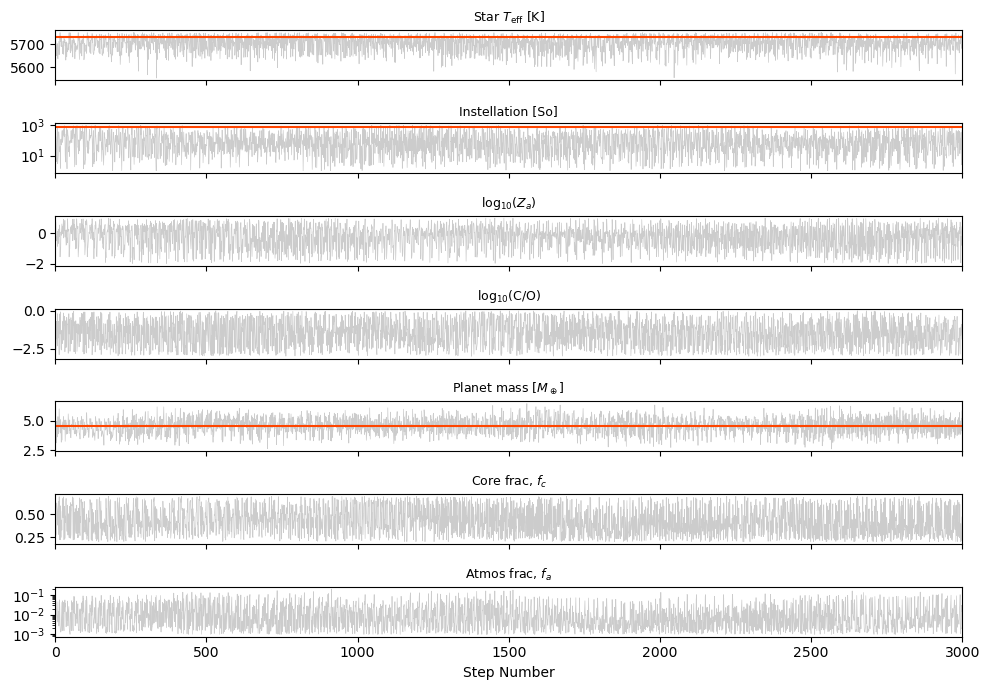

In [7]:
fig = ia.retrieve.plot_chain(samples,show=True)

Plot retrieval corner from 3000 samples
    Showing plot GUI


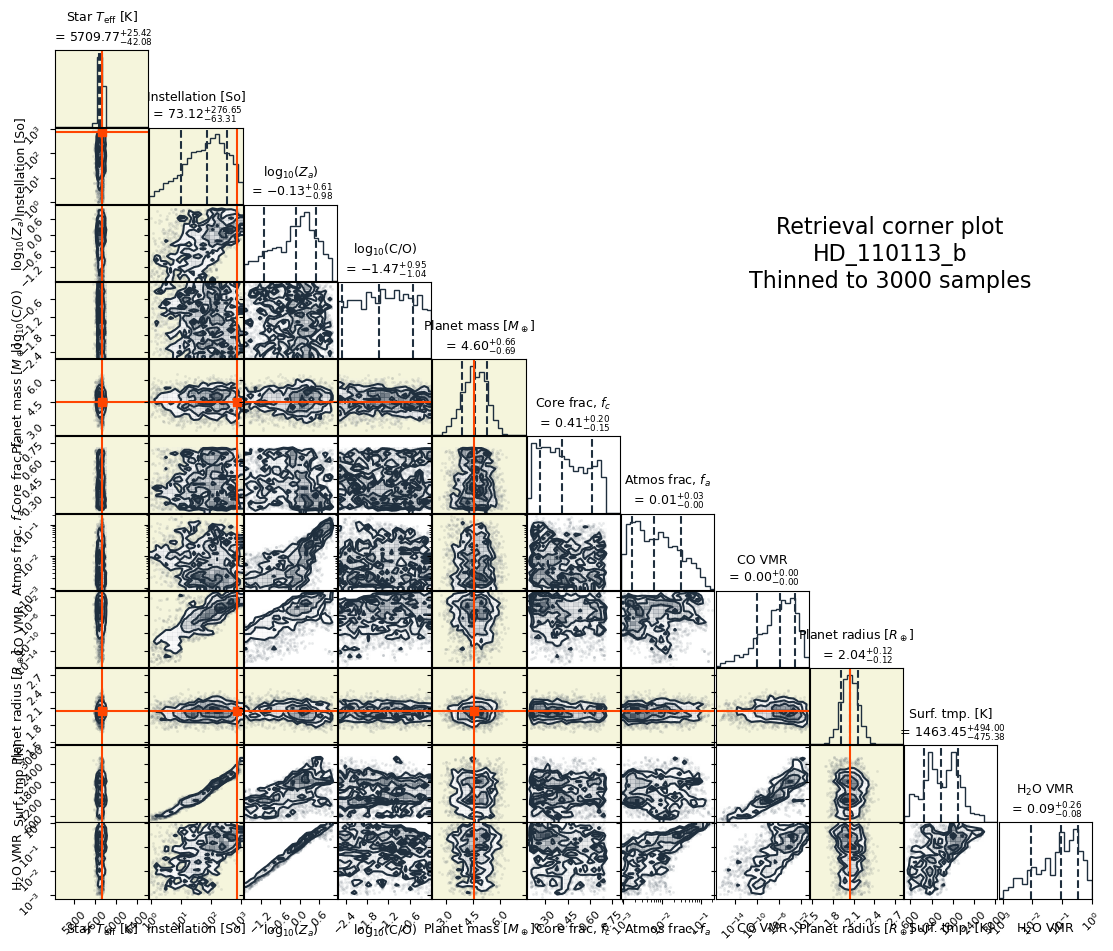

In [8]:
fig = ia.retrieve.plot_corner(keys, samples,show=True)
fig.savefig("nogit_out/corner.pdf", bbox_inches='tight')

In [9]:
ia.retrieve.write_csv(keys,samples, f"nogit_out/retrieve.csv");

Writing samples to 'nogit_out/retrieve.csv'
    done


In [10]:
# assemble grid input array in the same order as `gr.input_keys`
X = np.vstack([gr.data.loc[:,k] for k in gr.input_keys]).T

# number of random draws to visualise
rng = np.random.default_rng(42)
max_chain = len(samples)
min_chain = int(max_chain*0.90)
draw_idx = rng.choice(range(min_chain,max_chain,1), size=max_chain-min_chain, replace=True)

profs = []
dists = []
for i in draw_idx:
    # get sample from chain
    params = samples[i,:len(gr.input_keys)]

    # get euclidean distances in parameter-space
    dist_params = np.linalg.norm(X - params, axis=1)

    # get index of closest gridpoint
    idx = int(np.argmin(dist_params))
    succ = gr.data['succ'].iloc[idx]
    # if succ < 0.5:
    #     continue

    t = gr.profs['t'][idx,:].astype(float)
    p = gr.profs['p'][idx,:].astype(float) / ia.util.bar
    r = gr.profs['r'][idx,:].astype(float) / ia.util.R_earth
    e = gr.emits_fl[idx,:].astype(float)

    dists.append(dist_params[idx])
    profs.append(dict(idx=idx, t=t, p=p, r=r, e=e, succ=succ))

print(f"Sampled {len(profs)} points")

# Colormap
sm = mpl.cm.ScalarMappable(cmap='gray',
                           norm=mpl.colors.LogNorm(vmin=np.amin(dists),vmax=np.amax(dists)))

Sampled 300 points


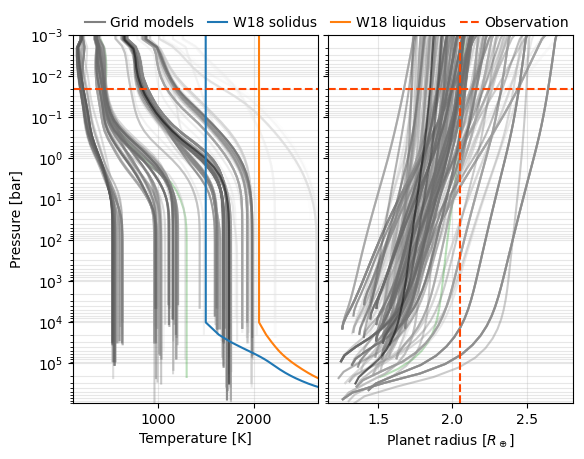

In [11]:
# Plot ensemble and median T(p)
fig, axs = plt.subplots(1,2,figsize=(5,4),sharey=True)
axl,axr = axs
mask = np.argsort(dists)[::-1]

ymin, ymax = 1,10
xmin, xmax = 100, 200
for i in mask:
    pr = profs[i]
    col = sm.to_rgba(dists[i])
    al = 0.5 * (np.amax(dists) - dists[i]) / (np.amax(dists)-np.amin(dists))

    if pr['succ'] < 0.5:
        col = 'tab:green'

    axl.plot(pr['t'], pr['p'], alpha=al, color=col)
    axr.plot(pr['r'], pr['p'], alpha=al, color=col)

    ymin = min(ymin,np.amin(pr['p']))
    ymax = max(ymax,np.amax(pr['p']))

    xmin = min(xmin,np.amin(pr['t']))
    xmax = max(xmax,np.amax(pr['t']))

axl.plot([],[],color='grey',label="Grid models")


for k,v in ia.plot.meltcurves.items():
    axl.plot(v[1],v[0],label=f"W18 {k}")

for ax in axs:
    ax.grid(True, which='both', alpha=0.3, zorder=-2)
    ax.axhline(20*1e-3, color='orangered', ls='dashed')
axr.axvline(obs["r_phot"][0], color='orangered', ls='dashed',label="Observation")


axl.set_yscale('log')
axl.set_ylabel('Pressure [bar]')
axl.set_ylim(top=ymin, bottom=ymax)

axl.set_xlabel(r'Temperature [K]')
axl.set_xlim(xmin,xmax)
axr.set_xlabel(ia.util.varprops["r_phot"].label)
axr.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))

fig.legend(loc='upper left', ncols=4, bbox_to_anchor=(0.0,1), frameon=False, handlelength=1.4, handletextpad=0.4, columnspacing=1)

# ax.legend()
fig.subplots_adjust(wspace=0.04, top=0.92,right=1,left=0,bottom=0)
plt.show()
fig.savefig("nogit_out/profs.pdf", bbox_inches='tight')

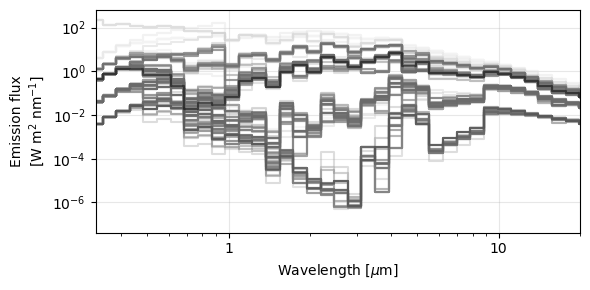

In [12]:
# Plot emission spectra from a sample set
fig, ax = plt.subplots(1,1,figsize=(6,3))

wl = gr.emits_wl

wl_wid = wl[1:] - wl[:-1]
wl_mid = 0.5 * (wl[:-1] + wl[1:])

x = wl_mid / 1e3

mask = np.argsort(dists)[::-1]
for i in mask:
    em = profs[i]['e'][:-1] / wl_wid
    col = sm.to_rgba(dists[i])
    al = 0.5 * (np.amax(dists) - dists[i]) / (np.amax(dists)-np.amin(dists))
    ax.step(x, em, alpha=al, color=col, where='mid')

ax.set_yscale('log')
ax.set_ylabel("Emission flux\n" +r"[W m$^2$ nm$^{-1}$]")

ax.set_xlim(left=np.amin(x), right=20.0)
ax.set_xscale("log")
ax.set_xlabel(r'Wavelength [$\mu$m]')
ax.grid(zorder=-2, alpha=0.3)
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter("%.0f"))

# ax.legend()
fig.tight_layout()
plt.show()
fig.savefig("nogit_out/emits.pdf", bbox_inches='tight')